# Lab 1: Spectral Analysis of Deterministic Signals
## Variant 14: IDFT Signal Synthesis using Matrix Multiplication

**Objective:** Synthesize a discrete-time signal using IDFT in matrix notation

**Input vector:** $x_\mu = [6, 2, 4, 3, 4, 5, 0, 0, 0]^T$ (N=9)

**Task:** 
- Show matrices W and K
- Plot the synthesized signal
- Verify the implementation

## 1. Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Helper Functions

### 2.1 Fourier Matrix Creation Function

In [2]:
def create_fourier_matrix(N):
    """
    Create the Fourier matrix W for given N
    
    W = e^(+j * 2π/N * K)
    where K contains all possible products k*μ
    
    Parameters:
    N (int): Size of the matrix (NxN)
    
    Returns:
    W (complex ndarray): NxN Fourier matrix
    K (int ndarray): NxN matrix of products k*μ
    """
    # Create indices for k and μ
    k_indices = np.arange(N).reshape(-1, 1)  # Column vector [0, 1, 2, ..., N-1]^T
    mu_indices = np.arange(N).reshape(1, -1)  # Row vector [0, 1, 2, ..., N-1]
    
    # Create matrix K containing all possible products k*μ
    K = k_indices @ mu_indices  # Outer product
    
    # Create twiddle factor
    W_N = np.exp(1j * 2 * np.pi / N)
    
    # Create Fourier matrix W
    W = W_N ** K
    
    return W, K

### 2.2 IDFT Matrix Synthesis Function

In [3]:
def idft_matrix_synthesis(x_mu, N):
    """
    Perform IDFT signal synthesis using matrix multiplication
    
    IDFT: x_k = (1/N) * W * x_μ
    
    Parameters:
    x_mu (complex ndarray): DFT coefficients vector
    N (int): Signal length
    
    Returns:
    x_k (complex ndarray): Synthesized time-domain signal
    W (complex ndarray): Fourier matrix
    K (int ndarray): Products matrix k*μ
    """
    # Create Fourier matrix
    W, K = create_fourier_matrix(N)
    
    # Ensure x_mu is a column vector
    x_mu = np.array(x_mu).reshape(-1, 1)
    
    # Perform IDFT: x_k = (1/N) * W * x_μ
    x_k = (1/N) * W @ x_mu
    
    return x_k.flatten(), W, K

### 2.3 Plotting Functions

In [6]:
def plot_matrices(W, K, N):
    """
    Plot the matrices W and K with proper formatting
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot matrix K
    im1 = axes[0].imshow(K, cmap='viridis', aspect='equal')
    axes[0].set_title(f'Matrix K (Products k·μ) for N={N}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('μ index', fontsize=12)
    axes[0].set_ylabel('k index', fontsize=12)
    
    # Add grid and values to K matrix
    for i in range(N):
        for j in range(N):
            axes[0].text(j, i, f'{K[i,j]}', ha='center', va='center', 
                        color='white' if K[i,j] > K.max()/2 else 'black', fontweight='bold')
    
    plt.colorbar(im1, ax=axes[0], label='k·μ value')
    
    # Plot magnitude of matrix W
    W_mag = np.abs(W)
    im2 = axes[1].imshow(W_mag, cmap='plasma', aspect='equal')
    axes[1].set_title(f'Matrix |W| (Magnitude) for N={N}', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('μ index', fontsize=12)
    axes[1].set_ylabel('k index', fontsize=12)
    plt.colorbar(im2, ax=axes[1], label='|W| magnitude')
    
    # Plot phase of matrix W
    W_phase = np.angle(W)
    im3 = axes[2].imshow(W_phase, cmap='hsv', aspect='equal')
    axes[2].set_title(f'Matrix ∠W (Phase) for N={N}', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('μ index', fontsize=12)
    axes[2].set_ylabel('k index', fontsize=12)
    plt.colorbar(im3, ax=axes[2], label='Phase [radians]')
    
    plt.tight_layout()
    plt.show()

def plot_signal_analysis(x_k, x_mu, N):
    """
    Plot the synthesized signal and frequency domain representation
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Time domain - Real part
    k_indices = np.arange(N)
    axes[0,0].stem(k_indices, np.real(x_k), basefmt='b-', linefmt='b-', markerfmt='bo')
    axes[0,0].set_title('Synthesized Signal - Real Part', fontsize=14, fontweight='bold')
    axes[0,0].set_xlabel('Sample index k', fontsize=12)
    axes[0,0].set_ylabel('Amplitude', fontsize=12)
    axes[0,0].grid(True, alpha=0.3)
    
    # Time domain - Imaginary part
    axes[0,1].stem(k_indices, np.imag(x_k), basefmt='r-', linefmt='r-', markerfmt='ro')
    axes[0,1].set_title('Synthesized Signal - Imaginary Part', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Sample index k', fontsize=12)
    axes[0,1].set_ylabel('Amplitude', fontsize=12)
    axes[0,1].grid(True, alpha=0.3)
    
    # Frequency domain - Magnitude
    mu_indices = np.arange(N)
    axes[1,0].stem(mu_indices, np.abs(x_mu), basefmt='g-', linefmt='g-', markerfmt='go')
    axes[1,0].set_title('DFT Coefficients - Magnitude |X[μ]|', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Frequency index μ', fontsize=12)
    axes[1,0].set_ylabel('Magnitude', fontsize=12)
    axes[1,0].grid(True, alpha=0.3)
    
    # Frequency domain - Phase
    x_mu_phase = np.angle(x_mu)
    # Only plot phase where magnitude is significant
    significant_indices = np.abs(x_mu) > 0.1
    axes[1,1].stem(mu_indices[significant_indices], x_mu_phase[significant_indices], 
                   basefmt='m-', linefmt='m-', markerfmt='mo')
    axes[1,1].set_title('DFT Coefficients - Phase ∠X[μ]', fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Frequency index μ', fontsize=12)
    axes[1,1].set_ylabel('Phase [radians]', fontsize=12)
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 3. Define Input Parameters (Variant 14)

According to the lab document, Variant 14 uses:
$$x_\mu = [6, 2, 4, 3, 4, 5, 0, 0, 0]^T$$

In [5]:
# Define the input DFT coefficients for Variant 14
x_mu = np.array([6, 2, 4, 3, 4, 5, 0, 0, 0], dtype=complex)
N = len(x_mu)

print("LAB 1: SPECTRAL ANALYSIS OF DETERMINISTIC SIGNALS")
print("Variant 14: IDFT Signal Synthesis using Matrix Multiplication")
print("="*70)
print(f"\nInput DFT coefficients (Variant 14):")
print(f"x_μ = {x_mu}")
print(f"Signal length N = {N}")

LAB 1: SPECTRAL ANALYSIS OF DETERMINISTIC SIGNALS
Variant 14: IDFT Signal Synthesis using Matrix Multiplication

Input DFT coefficients (Variant 14):
x_μ = [6.+0.j 2.+0.j 4.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j]
Signal length N = 9


## 4. Create and Display Matrices K and W

### 4.1 Generate Matrices

In [7]:
# Create Fourier matrix and K matrix
W, K = create_fourier_matrix(N)

print(f"Matrix K (Products k·μ) for N={N}:")
print("K =")
for i in range(N):
    print(f"[{' '.join([f'{K[i,j]:2d}' for j in range(N)])}]")

print(f"\nFourier Matrix W (first 4 rows, rounded to 3 decimal places):")
print("W =")
for i in range(min(4, N)):
    row_str = "["
    for j in range(N):
        if np.imag(W[i,j]) >= 0:
            row_str += f"{np.real(W[i,j]):6.3f}+{np.imag(W[i,j]):6.3f}j  "
        else:
            row_str += f"{np.real(W[i,j]):6.3f}{np.imag(W[i,j]):6.3f}j  "
    row_str += "]"
    print(row_str)
if N > 4:
    print("...")

Matrix K (Products k·μ) for N=9:
K =
[ 0  0  0  0  0  0  0  0  0]
[ 0  1  2  3  4  5  6  7  8]
[ 0  2  4  6  8 10 12 14 16]
[ 0  3  6  9 12 15 18 21 24]
[ 0  4  8 12 16 20 24 28 32]
[ 0  5 10 15 20 25 30 35 40]
[ 0  6 12 18 24 30 36 42 48]
[ 0  7 14 21 28 35 42 49 56]
[ 0  8 16 24 32 40 48 56 64]

Fourier Matrix W (first 4 rows, rounded to 3 decimal places):
W =
[ 1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j   1.000+ 0.000j  ]
[ 1.000+ 0.000j   0.766+ 0.643j   0.174+ 0.985j  -0.500+ 0.866j  -0.940+ 0.342j  -0.940-0.342j  -0.500-0.866j   0.174-0.985j   0.766-0.643j  ]
[ 1.000+ 0.000j   0.174+ 0.985j  -0.940+ 0.342j  -0.500-0.866j   0.766-0.643j   0.766+ 0.643j  -0.500+ 0.866j  -0.940-0.342j   0.174-0.985j  ]
[ 1.000+ 0.000j  -0.500+ 0.866j  -0.500-0.866j   1.000-0.000j  -0.500+ 0.866j  -0.500-0.866j   1.000-0.000j  -0.500+ 0.866j  -0.500-0.866j  ]
...


### 4.2 Visualize Matrices

C:\Users\grzeg\AppData\Local\Temp\ipykernel_49896\1445614154.py:37: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\grzeg\PycharmProjects\DSP\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


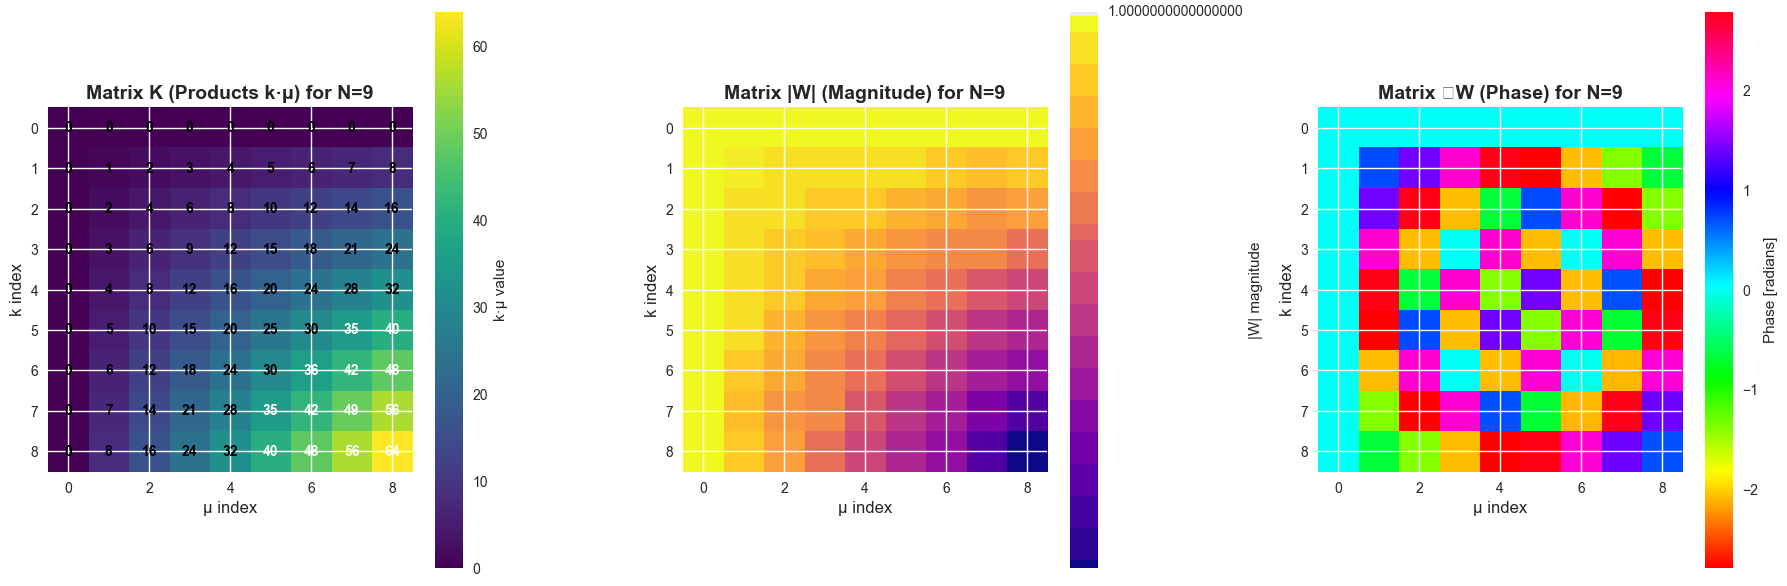

In [8]:
# Plot matrices K and W
plot_matrices(W, K, N)

## 5. Perform IDFT Signal Synthesis

Using the matrix equation: $x_k = \frac{1}{N} W x_\mu$

In [10]:
# Perform IDFT synthesis
print(f"Performing IDFT signal synthesis...")
x_k, W, K = idft_matrix_synthesis(x_mu, N)

# Display results
print(f"\nIDFT Results:")
print(f"Synthesized signal x[k]:")
for k in range(N):
    if np.imag(x_k[k]) >= 0:
        print(f"x[{k}] = {np.real(x_k[k]):8.4f} + {np.imag(x_k[k]):8.4f}j")
    else:
        print(f"x[{k}] = {np.real(x_k[k]):8.4f} - {abs(np.imag(x_k[k])):8.4f}j")

# Check if signal is real
is_real = np.allclose(np.imag(x_k), 0, atol=1e-10)
print(f"\nSignal is real (Im{{x[k]}} ≈ 0): {is_real}")
if is_real:
    print(f"Real-valued synthesized signal:")
    for k in range(N):
        print(f"x[{k}] = {np.real(x_k[k]):8.4f}")

Performing IDFT signal synthesis...

IDFT Results:
Synthesized signal x[k]:
x[0] =   2.6667 +   0.0000j
x[1] =  -0.1923 +   0.8312j
x[2] =   0.8870 +   0.1536j
x[3] =   0.1667 -   0.2887j
x[4] =   0.8053 +   0.1884j
x[5] =   0.8053 -   0.1884j
x[6] =   0.1667 +   0.2887j
x[7] =   0.8870 -   0.1536j
x[8] =  -0.1923 -   0.8312j

Signal is real (Im{x[k]} ≈ 0): False


## 6. Visualize Synthesized Signal

C:\Users\grzeg\AppData\Local\Temp\ipykernel_49896\1445614154.py:80: UserWarning: Glyph 8736 (\N{ANGLE}) missing from font(s) Arial.
  plt.tight_layout()


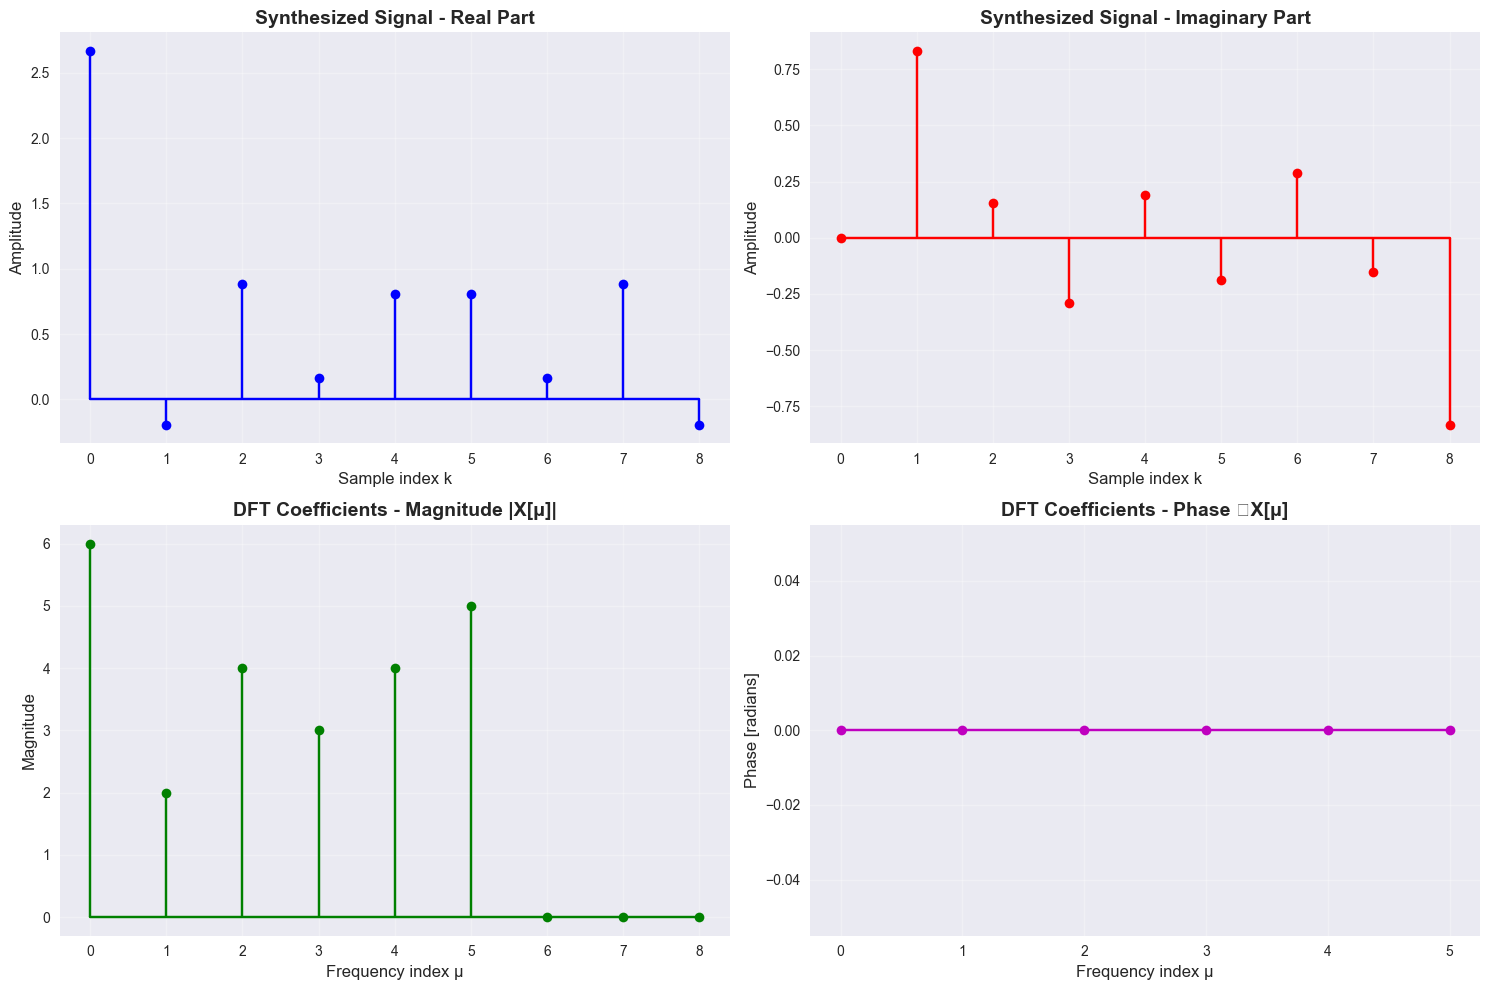

In [11]:
# Plot signal analysis
plot_signal_analysis(x_k, x_mu, N)

## 7. Verification

Verify the implementation by performing forward DFT to recover original coefficients.

In [12]:
# Verification: Forward DFT should recover original coefficients
print(f"Verification (Forward DFT):")
x_mu_recovered = W.conj().T @ x_k.reshape(-1, 1)
x_mu_recovered = x_mu_recovered.flatten()

print(f"Original x_μ:  {x_mu}")
print(f"Recovered x_μ: {x_mu_recovered}")
error = np.max(np.abs(x_mu - x_mu_recovered))
print(f"Max error: {error:.2e}")

# Check orthogonality property
W_conj_transpose = np.conj(W.T)
identity_check = W_conj_transpose @ W / N
is_unitary = np.allclose(identity_check, np.eye(N), atol=1e-10)

print(f"\nMatrix Properties:")
print(f"W^H * W / N ≈ I (Unitary check): {is_unitary}")
print(f"Max deviation from identity: {np.max(np.abs(identity_check - np.eye(N))):.2e}")

Verification (Forward DFT):
Original x_μ:  [6.+0.j 2.+0.j 4.+0.j 3.+0.j 4.+0.j 5.+0.j 0.+0.j 0.+0.j 0.+0.j]
Recovered x_μ: [6.00000000e+00+1.99840144e-15j 2.00000000e+00+2.33146835e-15j
 4.00000000e+00+2.10942375e-15j 3.00000000e+00+1.02695630e-15j
 4.00000000e+00-1.11022302e-16j 5.00000000e+00-5.10702591e-15j
 5.44009282e-15-8.10462808e-15j 8.10462808e-15-3.52495810e-15j
 1.14352972e-14+1.44328993e-15j]
Max error: 1.15e-14

Matrix Properties:
W^H * W / N ≈ I (Unitary check): True
Max deviation from identity: 4.00e-15
